# MSR function written in JUlia

In [6]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

%matplotlib inline

In [7]:
import h5py
file_name = "../../Project_MSR/Codes/Ryan_Original/src/data.hdf5"
f1 = h5py.File(file_name,'r+')
unfil_spikes =np.array(f1["Spikes_unfil"])

In [8]:
def opt_rel(signal,dt,Tnum_points):
    total_time=np.shape(signal)[0] * dt
    Tbin=np.logspace(np.log10(0.01),np.log10(total_time), Tnum_points)
    df = pd.DataFrame(columns=('Time', 'Hs','Hk','Hs+Hk'))

    for count, tt in enumerate(Tbin):

        mapping_ks=np.histogram(np.where(signal==1.0)[0] * dt, bins=np.arange(0.0, total_time + tt, tt))[0]

        ks_counts = np.asarray(Counter(mapping_ks).most_common())
        positive_values = np.where(ks_counts[:,0]>0)[0]
        kq, mq = ks_counts[:,0][positive_values], ks_counts[:,1][positive_values]
        assert np.sum(kq*mq)==np.sum(mapping_ks)
        M = float(np.sum(kq*mq))

        hk=-np.sum(((kq*mq)/M)*np.log2((kq*mq)/M))/np.log2(M)
        hs=-np.sum(((kq*mq)/M)*np.log2(kq/M))/np.log2(M)
        df.loc[count]=[tt,abs(hs),abs(hk),abs(hs+hk)]

    return df,df.loc[df["Hs+Hk"].idxmax()]


In [9]:
s1,s2=opt_rel(unfil_spikes[8],0.01,100)

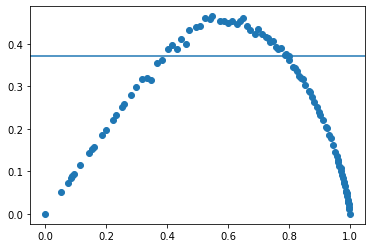

In [10]:
plt.scatter(s1.Hs.values,s1.Hk.values)
plt.axhline(s2.Hk)
plt.show()

In [11]:
s2

Time     1.843933
Hs       0.798917
Hk       0.371052
Hs+Hk    1.169968
Name: 44, dtype: float64

In [12]:
def opt_relv(signal,dt,Tnum_points):
    total_time=np.shape(signal)[0] * dt
    Tbin=np.logspace(np.log10(0.01),np.log10(total_time), Tnum_points)
    df = pd.DataFrame(columns=('Time', 'Hs','Hk','Hs+Hk'))

    for count, tt in enumerate(Tbin):

        mapping_ks=np.histogram(np.where(signal==1.0)[0] * dt, bins=np.arange(0.0, total_time + tt, tt))[0]

        ks_counts = np.asarray(Counter(mapping_ks).most_common())
        positive_values = np.where(ks_counts[:,0]>0)[0]
        kq, mq = ks_counts[:,0][positive_values], ks_counts[:,1][positive_values]
        assert np.sum(kq*mq)==np.sum(mapping_ks)
        M = float(np.sum(kq*mq))

        hk=-np.sum(((kq*mq)/M)*np.log2((kq*mq)/M))/np.log2(M)
        hs=-np.sum(((kq*mq)/M)*np.log2(kq/M))/np.log2(M)
        df.loc[count]=[tt,abs(hs),abs(hk),abs(hs+hk)]

    return df.loc[df["Hs+Hk"].idxmax()]

# Seting up Izhikevich  Parameters
[Simple Model of Spiking Neurons; IEEE Transactions on Neural Networks (2003) 14:1569- 1572 ](https://www.izhikevich.org/publications/spikes.htm)

In [48]:

pars={#                             a            b       c        d         I      V0  
    "tonic spiking" :              [0.02,      0.2,     -65,      6,       14,   -70.0], 
    #------------------------------------------------------------------------------------#
    "phasic spiking" :             [0.02,      0.25,    -65,      6,      0.5,   -64.0],
    #------------------------------------------------------------------------------------#
    "tonic bursting" :             [0.02,      0.2,     -50,      2,       15,   -70.0], 
    #------------------------------------------------------------------------------------#
    "phasic bursting" :             [0.02,      0.25,    -55,     0.05,    0.6,   -64.0], 
    #------------------------------------------------------------------------------------#
    "mixed mode" :                 [0.02,      0.2,     -55,     4,        10,   -70.0],
    #------------------------------------------------------------------------------------#
    "spike frequency adaptation" : [0.01,      0.2,     -65,     8,        30,   -70.0],
    #------------------------------------------------------------------------------------#
    "Class 1" :                    [0.02,     -0.1,     -55,     6,         0,   -60.0],
    #------------------------------------------------------------------------------------#
    "Class 2" :                    [0.2,       0.26,    -65,     0,         0,   -64.0],
    #------------------------------------------------------------------------------------#
    "spike latency" :              [0.02,      0.2,     -65,     6,         7,   -70.0],
    #------------------------------------------------------------------------------------#
    "subthreshold oscillations" :  [0.05,      0.26,    -60,     0,         0,   -62.0],
    #------------------------------------------------------------------------------------#
    "resonator" :                  [0.1,       0.26,    -60,    -1,         0,   -62.0],
    #------------------------------------------------------------------------------------#
    "integrator" :                 [0.02,      -0.1,    -55,     6,         0,   -60.0],
    #------------------------------------------------------------------------------------#
    "rebound spike" :              [0.03,      0.25,    -60,     4,         0,   -64.0],
    #------------------------------------------------------------------------------------#
    "rebound burst" :              [0.03,      0.25,    -52,     0,         0,   -64.0],
    #------------------------------------------------------------------------------------#
    "threshold variability" :      [0.03,      0.25,    -60,     4,         0,   -64.0],
    #------------------------------------------------------------------------------------#
    "bistability" :                [1,         1.5,     -60,     0,         0,   -61.0],
    #------------------------------------------------------------------------------------#
    "DAP" :                        [1,         0.2,     -60,    -21,        0,   -70.0],
    #------------------------------------------------------------------------------------#
    "accomodation" :               [0.02,      1,       -55,     4,         0,   -65.0],
    #------------------------------------------------------------------------------------#
    "inhibition-induced spiking" : [-0.02,     -1,      -60,     8,        80,   -63.8],
    #------------------------------------------------------------------------------------#
    "inhibition-induced bursting": [-0.026,    -1,      -45,     0,        80,   -63.8]
    #------------------------------------------------------------------------------------#
    };
name=[
    "tonic spiking",#1
    "phasic spiking",#2
    "tonic bursting",#3
    "phasic bursting",#4
    "mixed mode",#5
    "spike frequency adaptation",#6
    "Class 1",#7
    "Class 2",#8
    "spike latency",#9
    "subthreshold oscillations",#10
    "resonator",#11
    "integrator",#12
    "rebound spike",#13
    "rebound burst",#14
    "threshold variability",#15
    "bistability",#16
    "DAP",#17
    "accomodation",#18
    "inhibition-induced spiking",#19
    "inhibition-induced bursting"#20
     ];

# Importing MNIST DataSet

In [49]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [50]:
D0=train_images[np.where(train_labels==0)]
D1=train_images[np.where(train_labels==1)]
D2=train_images[np.where(train_labels==2)]
D3=train_images[np.where(train_labels==3)]
D4=train_images[np.where(train_labels==4)]
D5=train_images[np.where(train_labels==5)]
D6=train_images[np.where(train_labels==6)]
D7=train_images[np.where(train_labels==7)]
D8=train_images[np.where(train_labels==8)]
D9=train_images[np.where(train_labels==9)]
print(np.shape(D1),np.shape(D8))

(6742, 784) (5851, 784)


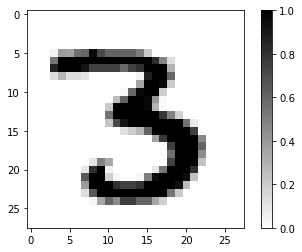

In [90]:
plt.imshow(D3[2,:].reshape(28,28),cmap="binary")
plt.colorbar()

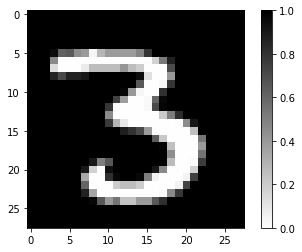

In [91]:
plt.imshow(abs(D3[2,:]-1).reshape(28,28),cmap="binary")
plt.colorbar()

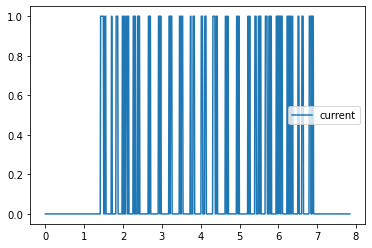

In [123]:
imgP=D3[2,:];
imgN=abs(D3[2,:]-1);
curr=np.zeros((np.shape(imgP)[0]),dtype="int")
curr[np.where(abs(np.diff(imgN))>0.001)]=1

niter=np.shape(current)[0]
dt = 0.01;
ti = 0.0; tf = niter*dt;
t=np.linspace(ti,tf,niter)

# plt.figure(figsize=(50,30))
# #plt.plot(imgN,label="Negative")
# #plt.plot(imgP,label="Positive")
plt.plot(t,curr,label="current")
plt.legend()

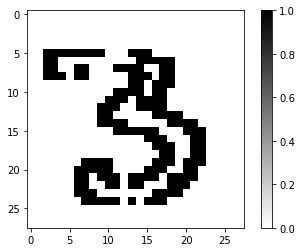

In [124]:
plt.imshow(curr.reshape(28,28),cmap="binary")
plt.colorbar()

In [125]:
opt_relv(curr,dt,200)

Time     0.088182
Hs       0.726915
Hk       0.383324
Hs+Hk    1.110239
Name: 65, dtype: float64

In [143]:
def cal_Orel(D):
    no_of_images=np.shape(D)[0]
    rel=[]
    
    for ig in range(no_of_images):
        img=D[ig,:];
 
        spk=np.zeros((np.shape(img)[0]),dtype="int")
        spk[np.where(abs(np.diff(img))>0.001)]=1


        rel.append(opt_relv(spk,dt,200).Hk)
    return rel

In [146]:
np.savetxt("0.dat",cal_Orel(D0),delimiter="\n")

In [147]:
%%time

#lMSRD0=cal_Orel(D0);
# lMSRD1=cal_msr(D1,nature);
# lMSRD2=cal_msr(D2,nature);
# lMSRD3=cal_msr(D3,nature);
# lMSRD4=cal_msr(D4,nature);
# lMSRD5=cal_msr(D5,nature);
# lMSRD6=cal_msr(D6,nature);
# lMSRD7=cal_msr(D7,nature);
# lMSRD8=cal_msr(D8,nature);
# lMSRD9=cal_msr(D9,nature);

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


# Solving ODE using Euler's Method 

In [100]:
def IZH_NeuModel(Indx,niter,dt,current):
    a,b,c,d,I,v=pars[name[Indx-1]];
    u=b*v;
    
    if niter!=np.shape(current)[0]:raise Exception("Sorry, Check current array!!") 
    
    state=[[v,u]] #Initial condition
    
    for t in range(1,niter+1):
        dv,du=((0.04*(v**2)) + (5*v) + 140 - u + current[t-1] ,a * ((b*v) - u) )
        v+=dt*dv;u+=dt*du
    
        if(v>=30.0):
            v=c
            u+=d
        state.append(np.array([v,u]))

    return np.array(state)

tonic spiking
CPU times: user 15.8 ms, sys: 0 ns, total: 15.8 ms
Wall time: 14.7 ms


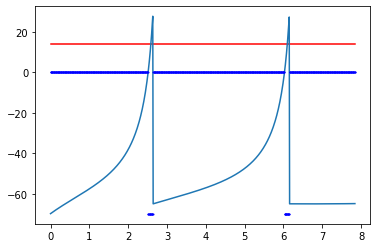

In [110]:
%%time

img=D3[2,:];
#img=abs(D3[2,:]-1);
##############################################
nature=1
_,_,_,_,I0,_=pars[name[nature-1]];
print(name[nature-1])
##########################################################
# Designing Input Current
current=I0*np.ones((np.shape(imgP)[0]),dtype="int")
#current[np.where(abs(np.diff(imgN))>0.001)]=255
###############################################################
niter=np.shape(current)[0]
dt = 0.01;
ti = 0.0; tf = niter*dt;
t=np.linspace(ti,tf,niter)
###########################################################
#Solving the IZH Equation
sol=IZH_NeuModel(nature,niter,dt,current)
vsol=sol[1:,0]
Spikes=np.zeros(np.shape(vsol),dtype=int)
Spikes[np.where(vsol>0.0)]=1

plt.plot(t,current,"r-",label="current")
plt.plot(t,vsol,label="Mem Pot")
plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

# Older Investigation

# Encoding 

In [24]:
def lenc(fw,r):
    return [r]*(fw) #[length]*(width) of the pulse

def wenc(fl,r):
    return [fl]*(r) #[length]*(width) of the pulse

from functools import reduce
from math import sqrt
def factors(n):
        step = 2 if n%2 else 1
        return set(reduce(list.__add__,
                    ([i, n//i] for i in range(1, int(sqrt(n))+1, step) if n % i == 0)))


def arenc(r):
        a=np.sort(list(factors(r)))
        N=np.shape(a)[0]
        if N==1:
            return [r]
        elif N==2:
            return [a[0]]*(a[-1]) #[length]*(width) of the pulse
        elif N==3:
            return [a[0]]*(a[-1]) #[length]*(width) of the pulse
        elif N==4:
            return [a[1]]*(a[-2]) #[length]*(width) of the pulse
        else:
            s=np.random.randint(1,(N/2))
            if a[s]*a[-s-1]!=r:raise Exception("Sorry, Area not conserved!!") 
            return [a[s]]*(a[-s-1]) #[length]*(width) of the pulse

# Testing 

In [ ]:
%%time

img=np.diff(np.array(255*D1[2,:],dtype=int));
##############################################
nature=1
_,_,_,_,I0,_=pars[name[nature-1]];
print(name[nature-1])
##########################################################
# Designing Input Current
curr=[]
for i in range(np.shape(img)[0]):
    if img[i]!=0:
        curr.append(wenc(I0,img[i]))    
    else:
        curr.append([0.0])
    
current=np.concatenate(curr, axis=None) #Width ENcoding
###############################################################
niter=np.shape(current)[0]
dt = 0.01;
ti = 0.0; tf = niter*dt;
t=np.linspace(ti,tf,niter)
###########################################################
#Solving the IZH Equation
sol=IZH_NeuModel(nature,niter,dt,current)
vsol=sol[1:,0]
Spikes=np.zeros(np.shape(vsol),dtype=int)
Spikes[np.where(vsol>0.0)]=1

plt.plot(t,current,"r-",label="current")
plt.plot(t,vsol,label="Mem Pot")
plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

In [ ]:
opt_relv(Spikes,dt,200)

## Testing Inverse

In [ ]:
%%time

img=np.diff(np.array(255*abs(D1[2,:]-1),dtype=int));
##############################################
nature=1
_,_,_,_,I0,_=pars[name[nature-1]];
print(name[nature-1])
##########################################################
# Designing Input Current
curr=[]
for i in range(np.shape(img)[0]):
    if img[i]!=0:
        curr.append(wenc(I0,img[i]))    
    else:
        curr.append([0.0])
    
current=np.concatenate(curr, axis=None) #Width ENcoding
###############################################################
niter=np.shape(current)[0]
dt = 0.01;
ti = 0.0; tf = niter*dt;
t=np.linspace(ti,tf,niter)
###########################################################
#Solving the IZH Equation
sol=IZH_NeuModel(nature,niter,dt,current)
vsol=sol[1:,0]
Spikes=np.zeros(np.shape(vsol),dtype=int)
Spikes[np.where(vsol>0.0)]=1

plt.plot(t,current,"r-",label="current")
plt.plot(t,vsol,label="Mem Pot")
plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

In [ ]:
opt_relv(Spikes,dt,200)

# Bluk Function for width encoding

In [ ]:
def enc(f,r):
    return [f]*(r) #[length]*(width) of the pulse

def cal_Orel(D,nature):
    no_of_images=np.shape(D)[0]
    rel=[]
    _,_,_,_,I0,_=pars[name[nature-1]];
    
    for ig in range(no_of_images):
        #Scalling the image from 0.0 1.0 to 0 to 255 
        img=np.array(255*D[ig,:],dtype=int);

        #Encoding 
        curr=[]
        for i in range(np.shape(img)[0]):
            if img[i]!=0:
                curr.append(enc(I0,img[i]))    
            else:
                curr.append([0.0])
        current=np.concatenate(curr, axis=None)

        #declaring time
        niter=np.shape(current)[0]
        dt = 0.01;
        #ti = 0.0; tf = niter*dt;
        #t=np.linspace(ti,tf,niter)

        sol=IZH_NeuModel(nature,niter,dt,current)
        Spikes=np.zeros(np.shape(sol[1:,0]),dtype=int)
        Spikes[np.where(sol[1:,0]>0.0)]=1

        #plt.plot(t,current,"r-",label="current")
        #plt.axhline(30.0)
        #plt.plot(t,vsol,label="Mem Pot")
        #plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

        rel.append(opt_relv(Spikes,dt,200).Hk)
    return rel

# Solving IZH Neuronal model with MNIST images as current Input

In [ ]:
%%time

nature=1
lMSRD0=cal_Orel(D0,nature);
# lMSRD1=cal_msr(D1,nature);
# lMSRD2=cal_msr(D2,nature);
# lMSRD3=cal_msr(D3,nature);
# lMSRD4=cal_msr(D4,nature);
# lMSRD5=cal_msr(D5,nature);
# lMSRD6=cal_msr(D6,nature);
# lMSRD7=cal_msr(D7,nature);
# lMSRD8=cal_msr(D8,nature);
# lMSRD9=cal_msr(D9,nature);

In [ ]:
for s in [lMSRD0,lMSRD1,lMSRD2,lMSRD3,lMSRD4,lMSRD5,lMSRD6,lMSRD7,lMSRD8,lMSRD9]:
  print(np.mean(s),np.std(s))

In [ ]:
import csv
a=[lMSRD0,lMSRD1,lMSRD2,lMSRD3,lMSRD4,lMSRD5,lMSRD6,lMSRD7,lMSRD8,lMSRD9]
with open("lMSR.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(a)

from google.colab import files
files.download('lMSR.csv')

In [ ]:
#About 15 mins

In [ ]:
nature=2
wMSRD0=cal_msr(D0,nature);
wMSRD1=cal_msr(D1,nature);
wMSRD2=cal_msr(D2,nature);
wMSRD3=cal_msr(D3,nature);
wMSRD4=cal_msr(D4,nature);
wMSRD5=cal_msr(D5,nature);
wMSRD6=cal_msr(D6,nature);
wMSRD7=cal_msr(D7,nature);
wMSRD8=cal_msr(D8,nature);
wMSRD9=cal_msr(D9,nature);

In [ ]:
for s in [wMSRD0,wMSRD1,wMSRD2,wMSRD3,wMSRD4,wMSRD5,wMSRD6,wMSRD7,wMSRD8,wMSRD9]:
  print(np.mean(s),np.std(s))

In [ ]:
import csv
a=[wMSRD0,wMSRD1,wMSRD2,wMSRD3,wMSRD4,wMSRD5,wMSRD6,wMSRD7,wMSRD8,wMSRD9]
with open("wMSR.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(a)

from google.colab import files
files.download('wMSR.csv')

In [ ]:
#About 25 mins each

# Bluk Function for Area encoding

In [ ]:
from functools import reduce
from math import sqrt
def factors(n):
        step = 2 if n%2 else 1
        return set(reduce(list.__add__,
                    ([i, n//i] for i in range(1, int(sqrt(n))+1, step) if n % i == 0)))


def enc(r):
        a=np.sort(list(factors(r)))
        N=np.shape(a)[0]
        if N==1:
            return [r]
        elif N==2:
            return [a[0]]*(a[-1]) #[length]*(width) of the pulse
        elif N==3:
            return [a[0]]*(a[-1]) #[length]*(width) of the pulse
        elif N==4:
            return [a[1]]*(a[-2]) #[length]*(width) of the pulse
        else:
            s=np.random.randint(1,(N/2))
            if a[s]*a[-s-1]!=r:raise Exception("Sorry, Area not conserved!!") 
            return [a[s]]*(a[-s-1]) #[length]*(width) of the pulse

def cal_msr(D,nature):
    no_of_images=np.shape(D)[0]
    msr=[]
    
    for ig in range(no_of_images):
        #Scalling the image from 0.0 1.0 to 0 to 255 
        img=np.array(255*D[ig,:],dtype=int);

        #Encoding 
        curr=[]
        for i in range(np.shape(img)[0]):
            if img[i]!=0:
                curr.append(enc(img[i]))    
            else:
                curr.append([0.0])
        current=np.concatenate(curr, axis=None)

        #declaring time
        niter=np.shape(current)[0]
        dt = 0.01;
        #ti = 0.0; tf = niter*dt;
        #t=np.linspace(ti,tf,niter)

        sol=IZH_NeuModel(nature,niter,dt,current)
        Spikes=np.zeros(np.shape(sol[1:,0]),dtype=int)
        Spikes[np.where(sol[1:,0]>0.0)]=1

        #plt.plot(t,current,"r-",label="current")
        #plt.axhline(30.0)
        #plt.plot(t,vsol,label="Mem Pot")
        #plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

        msr.append(Main.calculate_MSR(Spikes))
    return msr

In [ ]:
nature=2
aMSRD0=cal_msr(D0,nature);
aMSRD1=cal_msr(D1,nature);
aMSRD2=cal_msr(D2,nature);
aMSRD3=cal_msr(D3,nature);
aMSRD4=cal_msr(D4,nature);
aMSRD5=cal_msr(D5,nature);
aMSRD6=cal_msr(D6,nature);
aMSRD7=cal_msr(D7,nature);
aMSRD8=cal_msr(D8,nature);
aMSRD9=cal_msr(D9,nature);

In [ ]:
for s in [aMSRD0,aMSRD1,aMSRD2,aMSRD3,aMSRD4,aMSRD5,aMSRD6,aMSRD7,aMSRD8,aMSRD9]:
  print(np.mean(s),np.std(s))

In [ ]:
import csv
a=[aMSRD0,aMSRD1,aMSRD2,aMSRD3,aMSRD4,aMSRD5,aMSRD6,aMSRD7,aMSRD8,aMSRD9]
with open("aMSR.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(a)

from google.colab import files
files.download('aMSR.csv')

In [ ]:
import pandas as pd
df=pd.read_excel('1_aMSR.xlsx',header=None)
arX=[];arNS=[];arY=[];arYerr=[];
for index, row in df.iterrows():
  b=row.to_numpy(dtype=float)
  print(index+1,np.nanmedian(b),np.nanstd(b))
  arX.append(index+1)
  arY.append(np.nanmedian(b))
  arYerr.append(np.nanstd(b))
  arNS.append(b.size - np.isnan(b).sum())
    

In [ ]:

df=pd.read_excel('1_lMSR.xlsx',header=None)
lX=[];lNS=[];lY=[];lYerr=[];
for index, row in df.iterrows():
  b=row.to_numpy(dtype=float)
  print(index+1,np.nanmedian(b),np.nanstd(b))
  lX.append(index+1)
  lY.append(np.nanmedian(b))
  lYerr.append(np.nanstd(b))
  lNS.append(b.size - np.isnan(b).sum())
    

In [ ]:

df=pd.read_excel('1_wMSR.xlsx',header=None)
wX=[];wNS=[];wY=[];wYerr=[];
for index, row in df.iterrows():
  b=row.to_numpy(dtype=float)
  print(index+1,np.nanmedian(b),np.nanstd(b))
  wX.append(index+1)
  wY.append(np.nanmedian(b))
  wYerr.append(np.nanstd(b))
  wNS.append(b.size - np.isnan(b).sum())
    

In [ ]:
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
#plt.ylim([0.14,0.26])
plt.title("Length Encoding")
plt.scatter(lX,lY,c=lNS)
plt.errorbar(lX,lY,yerr=lYerr)
plt.colorbar()
plt.xticks(lX)
plt.grid()

plt.subplot(1,3,2)
#plt.ylim([0.14,0.26])
plt.title("Width Encoding")
plt.scatter(wX,wY,c=wNS)
plt.errorbar(wX,wY,yerr=wYerr)
plt.colorbar()
plt.xticks(wX)
plt.grid()

plt.subplot(1,3,3)
#plt.ylim([0.1,0.26])
plt.title("Area Encoding")
plt.scatter(arX,arY,c=arNS)
plt.errorbar(arX,arY,yerr=arYerr)
plt.colorbar()
plt.xticks(X)
plt.grid()

# Bluk Function for amplitude encoding

In [ ]:
def enc(r):
    return [r]*(10) #[length]*(width) of the pulse

def cal_msr(D,nature):
    no_of_images=np.shape(D)[0]
    msr=[]
    
    for ig in range(no_of_images):
        #Scalling the image from 0.0 1.0 to 0 to 255 
        img=np.array(255*D[ig,:],dtype=int);

        #Encoding 
        curr=[]
        for i in range(np.shape(img)[0]):
            if img[i]!=0:
                curr.append(enc(img[i]))    
            else:
                curr.append([0.0])
        current=np.concatenate(curr, axis=None)

        #declaring time
        niter=np.shape(current)[0]
        dt = 0.01;
        #ti = 0.0; tf = niter*dt;
        #t=np.linspace(ti,tf,niter)

        sol=IZH_NeuModel(nature,niter,dt,current)
        Spikes=np.zeros(np.shape(sol[1:,0]),dtype=int)
        Spikes[np.where(sol[1:,0]>0.0)]=1

        #plt.plot(t,current,"r-",label="current")
        #plt.axhline(30.0)
        #plt.plot(t,vsol,label="Mem Pot")
        #plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

        msr.append(Main.calculate_MSR(Spikes))
    return msr

# Solving IZH Neuronal model with MNIST images as current Input

In [ ]:
nature=1
lMSRD0=cal_msr(D0,nature);
lMSRD1=cal_msr(D1,nature);
lMSRD2=cal_msr(D2,nature);
lMSRD3=cal_msr(D3,nature);
lMSRD4=cal_msr(D4,nature);
lMSRD5=cal_msr(D5,nature);
lMSRD6=cal_msr(D6,nature);
lMSRD7=cal_msr(D7,nature);
lMSRD8=cal_msr(D8,nature);
lMSRD9=cal_msr(D9,nature);

In [ ]:
for s in [lMSRD0,lMSRD1,lMSRD2,lMSRD3,lMSRD4,lMSRD5,lMSRD6,lMSRD7,lMSRD8,lMSRD9]:
  print(np.mean(s),np.std(s))

In [ ]:
import csv
a=[lMSRD0,lMSRD1,lMSRD2,lMSRD3,lMSRD4,lMSRD5,lMSRD6,lMSRD7,lMSRD8,lMSRD9]
with open("1_lMSR.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(a)

from google.colab import files
files.download('1_lMSR.csv')

In [ ]:
#About 15 mins

# Bluk Function for width encoding

In [ ]:
def enc(r):
    return [10]*(r) #[length]*(width) of the pulse

def cal_msr(D,nature):
    no_of_images=np.shape(D)[0]
    msr=[]
    
    for ig in range(no_of_images):
        #Scalling the image from 0.0 1.0 to 0 to 255 
        img=np.array(255*D[ig,:],dtype=int);

        #Encoding 
        curr=[]
        for i in range(np.shape(img)[0]):
            if img[i]!=0:
                curr.append(enc(img[i]))    
            else:
                curr.append([0.0])
        current=np.concatenate(curr, axis=None)

        #declaring time
        niter=np.shape(current)[0]
        dt = 0.01;
        #ti = 0.0; tf = niter*dt;
        #t=np.linspace(ti,tf,niter)

        sol=IZH_NeuModel(nature,niter,dt,current)
        Spikes=np.zeros(np.shape(sol[1:,0]),dtype=int)
        Spikes[np.where(sol[1:,0]>0.0)]=1

        #plt.plot(t,current,"r-",label="current")
        #plt.axhline(30.0)
        #plt.plot(t,vsol,label="Mem Pot")
        #plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

        msr.append(Main.calculate_MSR(Spikes))
    return msr

In [ ]:
nature=1
wMSRD0=cal_msr(D0,nature);
wMSRD1=cal_msr(D1,nature);
wMSRD2=cal_msr(D2,nature);
wMSRD3=cal_msr(D3,nature);
wMSRD4=cal_msr(D4,nature);
wMSRD5=cal_msr(D5,nature);
wMSRD6=cal_msr(D6,nature);
wMSRD7=cal_msr(D7,nature);
wMSRD8=cal_msr(D8,nature);
wMSRD9=cal_msr(D9,nature);

In [ ]:
for s in [wMSRD0,wMSRD1,wMSRD2,wMSRD3,wMSRD4,wMSRD5,wMSRD6,wMSRD7,wMSRD8,wMSRD9]:
  print(np.mean(s),np.std(s))

In [ ]:
import csv
a=[wMSRD0,wMSRD1,wMSRD2,wMSRD3,wMSRD4,wMSRD5,wMSRD6,wMSRD7,wMSRD8,wMSRD9]
with open("1_wMSR.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(a)

from google.colab import files
files.download('1_wMSR.csv')

In [ ]:
#About 25 mins each

# Bluk Function for Area encoding

In [ ]:
from functools import reduce
from math import sqrt
def factors(n):
        step = 2 if n%2 else 1
        return set(reduce(list.__add__,
                    ([i, n//i] for i in range(1, int(sqrt(n))+1, step) if n % i == 0)))


def enc(r):
        a=np.sort(list(factors(r)))
        N=np.shape(a)[0]
        if N==1:
            return [r]
        elif N==2:
            return [a[0]]*(a[-1]) #[length]*(width) of the pulse
        elif N==3:
            return [a[0]]*(a[-1]) #[length]*(width) of the pulse
        elif N==4:
            return [a[1]]*(a[-2]) #[length]*(width) of the pulse
        else:
            s=np.random.randint(1,(N/2))
            if a[s]*a[-s-1]!=r:raise Exception("Sorry, Area not conserved!!") 
            return [a[s]]*(a[-s-1]) #[length]*(width) of the pulse

def cal_msr(D,nature):
    no_of_images=np.shape(D)[0]
    msr=[]
    
    for ig in range(no_of_images):
        #Scalling the image from 0.0 1.0 to 0 to 255 
        img=np.array(255*D[ig,:],dtype=int);

        #Encoding 
        curr=[]
        for i in range(np.shape(img)[0]):
            if img[i]!=0:
                curr.append(enc(img[i]))    
            else:
                curr.append([0.0])
        current=np.concatenate(curr, axis=None)

        #declaring time
        niter=np.shape(current)[0]
        dt = 0.01;
        #ti = 0.0; tf = niter*dt;
        #t=np.linspace(ti,tf,niter)

        sol=IZH_NeuModel(nature,niter,dt,current)
        Spikes=np.zeros(np.shape(sol[1:,0]),dtype=int)
        Spikes[np.where(sol[1:,0]>0.0)]=1

        #plt.plot(t,current,"r-",label="current")
        #plt.axhline(30.0)
        #plt.plot(t,vsol,label="Mem Pot")
        #plt.plot(t,Spikes*(-70.0),"bo",ms=1,label="Spikes")

        msr.append(Main.calculate_MSR(Spikes))
    return msr

In [ ]:
nature=1
aMSRD0=cal_msr(D0,nature);
aMSRD1=cal_msr(D1,nature);
aMSRD2=cal_msr(D2,nature);
aMSRD3=cal_msr(D3,nature);
aMSRD4=cal_msr(D4,nature);
aMSRD5=cal_msr(D5,nature);
aMSRD6=cal_msr(D6,nature);
aMSRD7=cal_msr(D7,nature);
aMSRD8=cal_msr(D8,nature);
aMSRD9=cal_msr(D9,nature);

In [ ]:
for s in [aMSRD0,aMSRD1,aMSRD2,aMSRD3,aMSRD4,aMSRD5,aMSRD6,aMSRD7,aMSRD8,aMSRD9]:
  print(np.mean(s),np.std(s))

In [ ]:
import csv
a=[aMSRD0,aMSRD1,aMSRD2,aMSRD3,aMSRD4,aMSRD5,aMSRD6,aMSRD7,aMSRD8,aMSRD9]
with open("1_aMSR.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(a)

from google.colab import files
files.download('1_aMSR.csv')